<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/ss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy
from numpy import array
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

from sklearn.ensemble import RandomForestClassifier

In [9]:
nls_columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'class']

CLASSIFIER_COLUMN = 41

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('drive/MyDrive/KDDTrain+_20Percent.txt', header=None)
dataSet_test = pd.read_csv('drive/MyDrive/KDDTest-21.txt', header=None)


In [11]:
#get SYN flood attack series (neptune)
normal_val_test=dataSet_test.loc[dataSet_test[CLASSIFIER_COLUMN]=='normal']
syn_val_test=dataSet_test.loc[dataSet_test[CLASSIFIER_COLUMN]=='ipsweep']

#create a variable withh all data
all_data_test=pd.concat([normal_val_test, syn_val_test])

In [12]:
def prepare_labels(df):
    categ = df[CLASSIFIER_COLUMN].value_counts()
    labels = {}
    ctr = 0
    for idx in categ.index:
        labels[idx] = ctr
        ctr += 1

        df.loc[(df[CLASSIFIER_COLUMN] == idx), CLASSIFIER_COLUMN] = ctr

    return df

In [14]:
all_data=prepare_labels(all_data_test)
all_data[CLASSIFIER_COLUMN]=pd.to_numeric(all_data[CLASSIFIER_COLUMN])

In [17]:
all_data_test=prepare_labels(all_data_test)
all_data_test[CLASSIFIER_COLUMN]=pd.to_numeric(all_data_test[CLASSIFIER_COLUMN])

In [20]:
def preproc_data(df):
    # We delete columns with 0
    df = df.loc[:, (df != 0).any(axis=0)]

    # We delete columns with non-numeric values
    non_numerical = []
    for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
            non_numerical.append(col)
    df = df.drop(columns=non_numerical)
    return df

In [21]:
all_data=preproc_data(all_data)
print(all_data)

       0    4   5   7   9   10  11  12  ...    35    36   37   38    39   40  41  42
3       0   53  55   0   0   0   0   0  ...  0.87  0.00  0.0  0.0  0.00  0.0   1  17
8       0   56  52   0   0   0   0   0  ...  0.93  0.00  0.0  0.0  0.00  0.0   1  17
9       0  192   0   0   0   0   0   0  ...  0.09  0.04  0.0  0.0  0.01  0.0   1  20
28      0   43  43   0   0   0   0   0  ...  0.25  0.00  0.0  0.0  0.00  0.0   1  18
32      0   44  44   0   0   0   0   0  ...  0.00  0.00  0.0  0.0  0.00  0.0   1  18
...    ..  ...  ..  ..  ..  ..  ..  ..  ...   ...   ...  ...  ...   ...  ...  ..  ..
11548   0   18   0   0   0   0   0   0  ...  1.00  1.00  0.0  0.0  0.00  0.0   2  17
11552   0    8   0   0   0   0   0   0  ...  1.00  0.51  0.0  0.0  0.00  0.0   2  17
11578   0    8   0   0   0   0   0   0  ...  1.00  0.57  0.0  0.0  0.00  0.0   2  15
11778   0   18   0   0   0   0   0   0  ...  1.00  1.00  0.0  0.0  0.00  0.0   2  18
11838   0   18   0   0   0   0   0   0  ...  1.00  1.00  0.0  0.0

In [ ]:
all_data_test=preproc_data(all_data-test)
print(all_data_test)

In [24]:
def neural_network_fit(df,activation_function,loss_error,batch_size_value,number_of_epochs,neurons_on_hidden_layout):
  data_arr=df.to_numpy()
  nb_cols=numpy.shape(data_arr)[1]

  model=Sequential()
  model.add(Dense(neurons_on_hidden_layout,activation=activation_function,input_dim=nb_cols-2))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss=loss_error)

  train_data=data_arr[:,0:(nb_cols-2)]
  label_data=data_arr[:,(nb_cols-2)]

  epoch_error=model.fit(train_data,label_data,batch_size=batch_size_value, epochs=number_of_epochs,verbose=1)
  return model,epoch_error

Epoch 1/20
115/115 [==============================] - 1s 1ms/step - loss: 1.0968
Epoch 2/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1099
Epoch 3/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0689
Epoch 4/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 5/20
115/115 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 11/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 12/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 13/20
115/115 [====

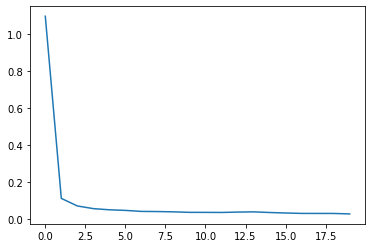

In [25]:
neural_model, epoch_error=neural_network_fit(all_data,"sigmoid","mae",20,20,50)
plt.plot(epoch_error.history["loss"])

In [26]:
def neural_networc_predict(neural_model, dataSet):
    # Prepare the data
    data_arr = dataSet.to_numpy()
    nb_cols = numpy.shape(data_arr)[1]

    predict_data = data_arr[:,0:(nb_cols-2)]
    label_data = data_arr[:,(nb_cols-1)]

    prediction = neural_model.predict(predict_data)
    errors = abs(prediction - label_data)

    print('Mean Absolute Error:', round(numpy.mean(errors), 4), 'degrees.')

    # Plot a selection of features
    fig, axs = plt.subplots(2)

    axs[0].plot(prediction)
    axs[1].plot(label_data)
    plt.show()

# Now predict


Mean Absolute Error: 15.2869 degrees.


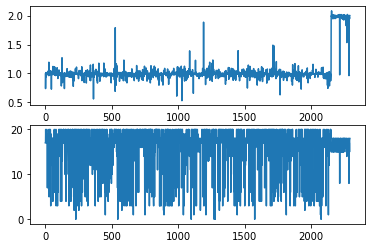

In [28]:
neural_networc_predict(neural_model, all_data)